In [1]:
import pandas as pd

# Load SMOTE balanced dataset
df = pd.read_csv('../../data/balanced/asteroid_smote.csv')
X = df.drop('Hazardous', axis=1)
y = df['Hazardous']


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1)  # Use all CPU cores

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

        Safe       1.00      1.00      1.00    187308
   Hazardous       1.00      1.00      1.00    187307

    accuracy                           1.00    374615
   macro avg       1.00      1.00      1.00    374615
weighted avg       1.00      1.00      1.00    374615

ROC AUC Score: 1.0000


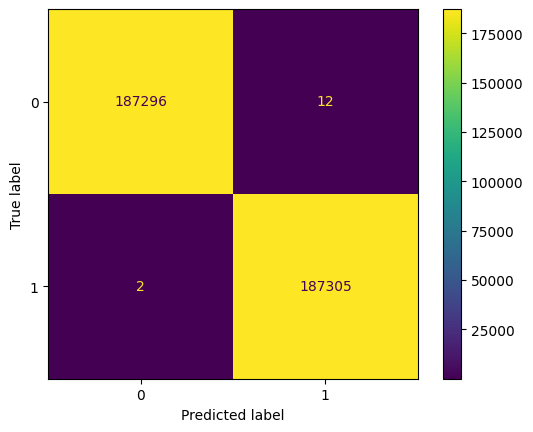

In [4]:
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Safe', 'Hazardous']))

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(f"ROC AUC Score: {roc_auc:.4f}")

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.show()


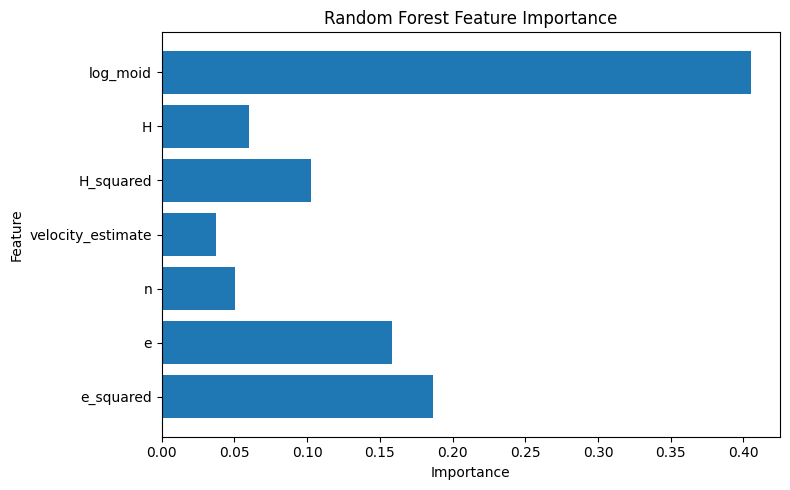

In [5]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig('../../figures/day3_model_feature_importances.png')
plt.show()


In [6]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    scale_pos_weight=1,
    random_state=42,
    n_jobs=-1)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    187308
         1.0       1.00      1.00      1.00    187307

    accuracy                           1.00    374615
   macro avg       1.00      1.00      1.00    374615
weighted avg       1.00      1.00      1.00    374615

XGBoost ROC AUC: 0.9999998728198798


In [7]:
import joblib

joblib.dump(model, '../../models/random_forest_day3.pkl')
joblib.dump(xgb_model, '../../models/xgboost_day3.pkl')


['../../models/xgboost_day3.pkl']